In [71]:
# Importing dependencies
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import seaborn as sns
sns.set_theme()
outpath = os.path.join("plots")

In [73]:

# Loading the csv-files and checking shape
data = pd.read_pickle(os.path.join('data','preprocessed_data_medium.pkl'))
print(data.shape)
data

(422567, 5)


,document,sub_reddit,date,type,language
0,"Ya pomniu etogo ""diktatora"" I ivo rech....day ...",ukraina,2022-03-23,submission,hr
1,"""Why Russians should take collective responsib...",ukraina,2022-03-23,submission,en
2,Reach out to russians and inform them about wa...,ukraina,2022-03-23,submission,en
3,"March 23, 2022: UA Air Force destroyed 7 Russi...",ukraina,2022-03-23,submission,en
4,Zelenskyy addresses in English: “I ask you to ...,ukraina,2022-03-23,submission,en
...,...,...,...,...,...
450184,It's on the home page articles today,geopolitics,2022-03-07,comment,en
450185,It really is wild to see him so badly miscalcu...,geopolitics,2022-03-07,comment,en
450186,panic fear and being cut off from swift \nrus...,geopolitics,2022-03-07,comment,en
450187,Post a [submission statement](https://www.redd...,geopolitics,2022-03-07,comment,en


### Summary statistics

In [74]:
# summary stats for document length (number of words)
temp = data[data['document'].apply(lambda x: isinstance(x, str))] # ensuring all documents are str
temp["doc_length"] = temp["document"].apply(lambda x: len(x.split()))
temp["doc_length"].describe()

/tmp/ipykernel_1039/1834408863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["doc_length"] = temp["document"].apply(lambda x: len(x.split()))


count    422565.000000
mean         28.247448
std          42.428303
min           1.000000
25%           8.000000
50%          16.000000
75%          33.000000
max        1541.000000
Name: doc_length, dtype: float64

In [75]:
# Printing the longest document
test = temp[temp.doc_length == 1541]
for i in test.document:
    print(i)

Here's some updated text based on a bit of input from u/ibuprophane below.

\---  
Dear Russian friends,

We, the people of Europe, write to you, the people of Russia, independently of our respective leaders, as one people to another, who are not so different, to make a offer of peace and friendship to you.

Our leaders have only weapons, sanctions and diplomatic relations with Putin’s government at their disposal. They cannot speak to you, the people of Russia, and certainly not as peers and friends. We can. Our leaders may prefer we didn’t, but they will not stop us - and if they wanted to, they cannot, because we are free people.


We, like you, are regular people.

We, like you, are parents, husbands and wives, children, aunts and uncles, grandparents and cousins, friends and colleagues - and we, like you, have many relationships we are yet to form.

We, like you, are teachers, nurses, doctors, engineers, builders, construction workers, government employees, scientists, police and 

In [76]:
# Remove this when run on clear data
data = data.drop(data[data.type == 'en'].index)
data = data.drop(data[data.type == 'uk'].index)

In [77]:
# get overall number of submissions and comments
data["type"].value_counts()

comment       408031
submission     14536
Name: type, dtype: int64

In [78]:
# get number of submissions and comments per subreddit
data.groupby("sub_reddit")["type"].value_counts()

sub_reddit             type      
CombatFootage          comment        58628
                       submission      1042
CredibleDefense        comment         4136
                       submission        52
RussiaUkraineWar2022   comment        13872
                       submission       882
UkraineConflict        comment         2635
                       submission       464
UkraineInvasionVideos  comment         4773
                       submission       642
UkraineWarReports      comment         4942
                       submission       532
UkraineWarVideoReport  comment        67926
                       submission      1714
UkrainianConflict      comment        75854
                       submission      2767
geopolitics            comment         2382
                       submission       147
ukraina                comment         4665
                       submission       620
ukraine                comment       163454
                       submission      521

#### Volume

Text(0, 0.5, 'document count')

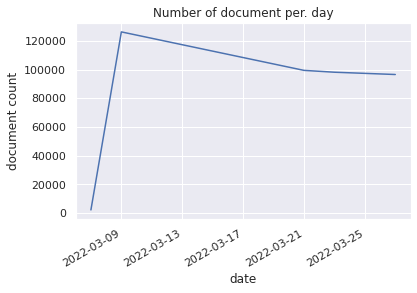

In [89]:
# plot volume per day
# convert to date
data['date'] = pd.to_datetime(data['date'])
volume = data["date"].value_counts()
volume.plot()
plt.title('Number of document per. day')
plt.xlabel('date')
plt.ylabel('document count')

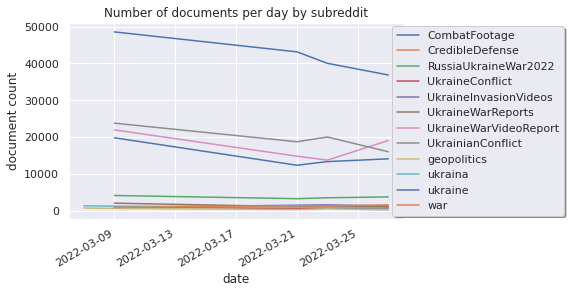

In [107]:
# plot volume per day by subreddit

vol_by_sub = data.groupby("sub_reddit")["date"].value_counts()
vol_by_sub = vol_by_sub.unstack(level=[1]).T
outfile = os.path.join(outpath, "sr_volume.png")
plt.Figure()
vol_by_sub.plot()
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5), fancybox=True, shadow=True)
plt.title('Number of documents per day by subreddit')
plt.ylabel('document count')
plt.savefig(outfile, bbox_inches = 'tight')


In [313]:
volume_sr

sub_reddit,CombatFootage,CredibleDefense,RussiaUkraineWar2022,UkraineConflict,UkraineInvasionVideos,UkraineWarReports,UkraineWarVideoReport,UkrainianConflict,geopolitics,ukraina,ukraine,war
date,,,,,,,,,,,,
2022-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,762.0,1365.0,NaN,NaN
2022-03-09,19828.0,954.0,4154.0,1115.0,981.0,2071.0,21969.0,23803.0,648.0,1254.0,48582.0,919.0
2022-03-21,12373.0,1142.0,3289.0,557.0,1513.0,1125.0,14830.0,18747.0,333.0,992.0,43159.0,1382.0
2022-03-23,13358.0,1228.0,3536.0,689.0,1630.0,1123.0,13755.0,20040.0,550.0,903.0,40047.0,1298.0
2022-03-27,14109.0,864.0,3775.0,738.0,1290.0,1155.0,19085.0,16030.0,236.0,770.0,36882.0,1621.0


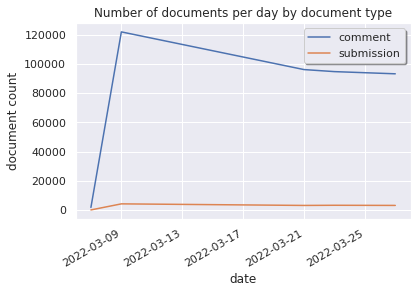

In [114]:
# plot volume per day by type
volume_t = data.groupby("type")["date"].value_counts()
volume_t = volume_t.unstack(level=[1]).T
outfile = os.path.join(outpath, "type_volume.png")
plt.Figure()
volume_t.plot()
plt.legend(loc='upper right', fancybox=True, shadow=True)
plt.title('Number of documents per day by document type')
plt.ylabel('document count')
plt.savefig(outfile, bbox_inches = 'tight')


#### Subreddits

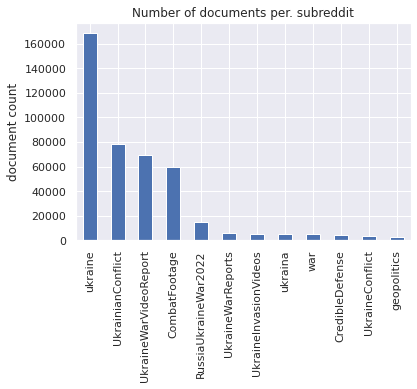

In [127]:
# plot number of entries per subreddit
outfile = os.path.join(outpath, "subreddit_count.png")
plt.Figure()
sr_plot = data["sub_reddit"].value_counts().plot.bar()
plt.ylabel('document count')
plt.title('Number of documents per. subreddit')
sr_plot.figure.savefig(outfile, bbox_inches = 'tight')

In [163]:
sr_lang = data.groupby("sub_reddit")["language"].value_counts()
sr_lang = sr_lang.unstack(level=[1])
sr_lang[['en', 'uk']]

language,en,uk
sub_reddit,,
CombatFootage,54878.0,12.0
CredibleDefense,4094.0,NaN
RussiaUkraineWar2022,13266.0,10.0
UkraineConflict,2857.0,2.0
UkraineInvasionVideos,4757.0,4.0
UkraineWarReports,4998.0,3.0
UkraineWarVideoReport,63238.0,28.0
UkrainianConflict,73346.0,9.0
geopolitics,2464.0,NaN


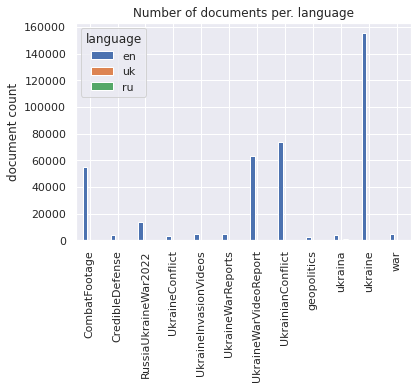

In [166]:
# plot number of posts per language by subreddit
outfile = os.path.join(outpath, "subreddit_language.png")
sr_lang = data.groupby("sub_reddit")["language"].value_counts()
sr_lang = sr_lang.unstack(level=[1])
plt.Figure()
lang_plot = sr_lang[['en', 'uk', 'ru']].plot.bar()
plt.ylabel('document count')
plt.xlabel('')
plt.title('Number of documents per. language')
sr_plot.figure.savefig(outfile, bbox_inches = 'tight')


In [145]:
doc_len = temp.groupby("sub_reddit")["doc_length"].describe()
doc_len

,count,mean,std,min,25%,50%,75%,max
sub_reddit,,,,,,,,
CombatFootage,59670.0,26.884917,37.856043,1.0,8.0,16.0,32.0,1204.0
CredibleDefense,4188.0,58.552770,79.399356,1.0,18.0,35.0,70.0,1326.0
RussiaUkraineWar2022,14754.0,28.644774,42.895894,1.0,7.0,15.0,34.0,1541.0
UkraineConflict,3099.0,27.990965,43.341088,1.0,8.0,15.0,32.0,660.0
UkraineInvasionVideos,5415.0,20.424746,37.680973,1.0,6.0,12.0,23.0,1390.0
UkraineWarReports,5474.0,27.185970,33.449588,1.0,8.0,17.0,41.0,535.0
UkraineWarVideoReport,69640.0,25.762019,36.741708,1.0,7.0,15.0,31.0,1099.0
UkrainianConflict,78620.0,29.963330,45.152889,1.0,8.0,17.0,35.0,1389.0
geopolitics,2529.0,54.296955,78.833425,1.0,13.0,32.0,62.0,1528.0


#### Language

In [146]:
# get number of entries per language
print(data["language"].value_counts())

en       387559
de         2717
af         2680
none       2492
hr         2040
da         2004
fr         1893
so         1800
nl         1475
tl         1464
it         1366
no         1338
id         1247
et         1233
cy         1146
ru          969
ro          846
tr          741
ca          731
fi          702
es          655
uk          646
sv          640
sl          632
pt          598
pl          535
sw          504
lt          344
sq          334
vi          330
sk          264
hu          225
cs          131
bg          123
lv           87
mk           50
ja            9
zh-cn         5
he            3
ar            2
el            2
ko            2
fa            1
kn            1
ur            1
Name: language, dtype: int64


In [ ]:
# get table of language percentages across subreddits
en_ru_uk = sr_lang[["en","ru","uk"]]
x = data["sub_reddit"].value_counts()
df = pd.concat([en_ru_uk, x.rename("total")], axis=1)

# find percentages
en_ru_uk['en_percent'] = df['en'] / df['total'] * 100
en_ru_uk['ru_percent'] = df['ru'] / df['total'] * 100
en_ru_uk['uk_percent'] = df['uk'] / df['total'] * 100

# round decimals
en_ru_uk.round(decimals = 2)